# [Matplotlib](#Matplotlib)
# [Seaborn](#Seaborn)

# Matplotlib
Library which gives us many ways to visualize and customize the visualization of our data.

- [Plot](#Plot)
- [Bar](#Bar)
- [Pie](#Pie)
- [Histogram](#Histogram)
- [Scatter](#Scatter)


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Plot

In [3]:
df = pd.read_csv('../datasets/spanish-silver/spanish-silver.csv')
df.head()

,year,situados_paid,silver_minted,was_american_revolution
0,1720,1226215,7874315,0
1,1721,1046440,9460730,0
2,1722,376311,8823927,0
3,1723,921332,8107343,0
4,1724,928764,7872819,0


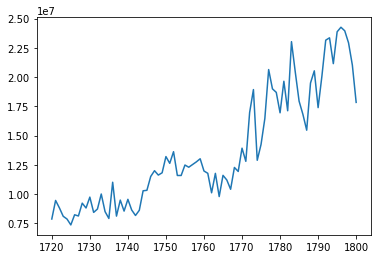

In [4]:
plt.plot(df.year, df.silver_minted)
plt.show()

We might want to look at a specific area of the plot

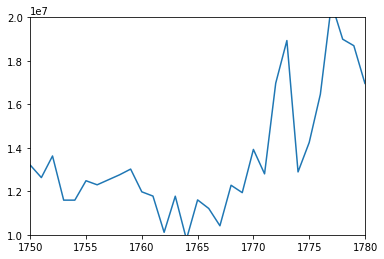

In [5]:
plt.figure()
plt.plot(df.year, df.silver_minted)
plt.axis([1750, 1780, 10000000, 20000000])
plt.show()

It's also important to describe the axis and the plot itself

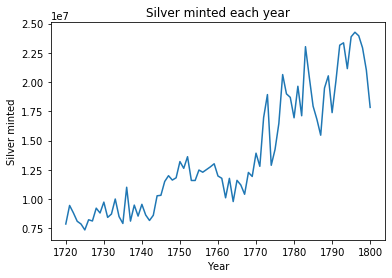

In [6]:
plt.plot(df.year, df.silver_minted)
plt.title('Silver minted each year')
plt.xlabel('Year')
plt.ylabel('Silver minted')
plt.show()

We might also want to plot multiple things together

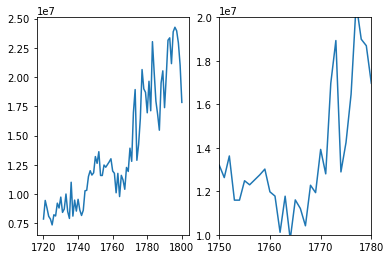

In [7]:
#plt.subplot(rows, columns, subplot)
plt.subplot(1, 2, 1)
plt.plot(df.year, df.silver_minted)

plt.subplot(1, 2, 2)
plt.plot(df.year, df.silver_minted)
plt.axis([1750, 1780, 10000000, 20000000])

plt.show()

We can customize the margings between the subplots (top, bottom, left, right, wspace, hspace...)

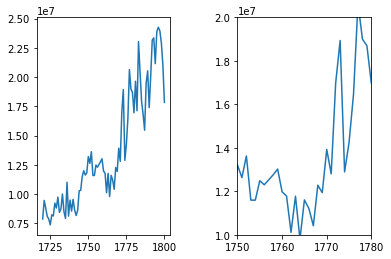

In [8]:
plt.subplot(1, 2, 1)
plt.plot(df.year, df.silver_minted)

plt.subplot(1, 2, 2)
plt.plot(df.year, df.silver_minted)
plt.axis([1750, 1780, 10000000, 20000000])
plt.subplots_adjust(wspace=0.5)

plt.show()

When plotting multiple things in the same plot we can make a legend to describe the plot.

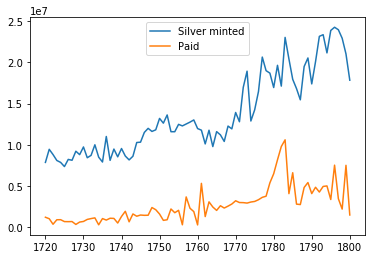

In [9]:
plt.plot(df.year, df.silver_minted)
plt.plot(df.year, df.situados_paid)

plt.legend(['Silver minted', 'Paid'], loc='upper center')

Same thing other way:

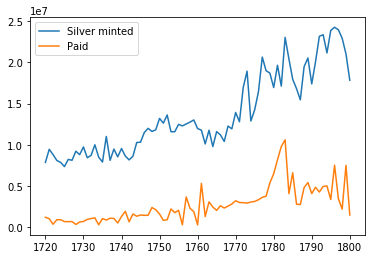

In [10]:
plt.plot(df.year, df.silver_minted, label='Silver minted')
plt.plot(df.year, df.situados_paid, label='Paid')

plt.legend(loc='upper left')

It's also possible to create the figure with a specific size instead of default

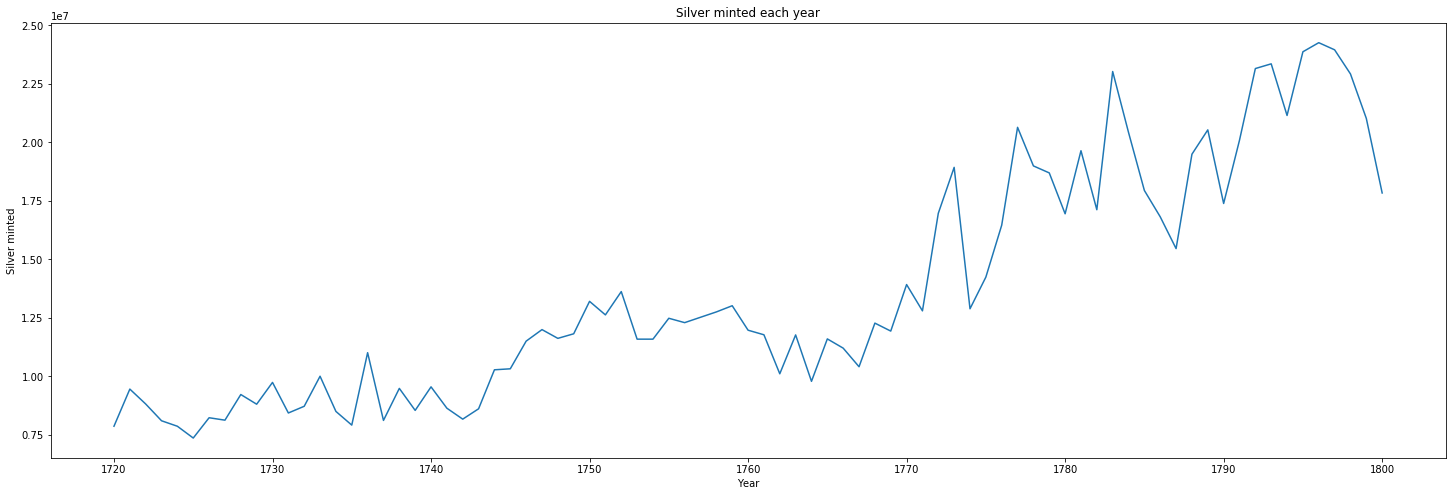

In [11]:
plt.figure(figsize=(25,8))
plt.plot(df.year, df.silver_minted)
plt.title('Silver minted each year')
plt.xlabel('Year')
plt.ylabel('Silver minted')
plt.show()

We can also customize how a plot is displayed (markeds, color and linestyle)

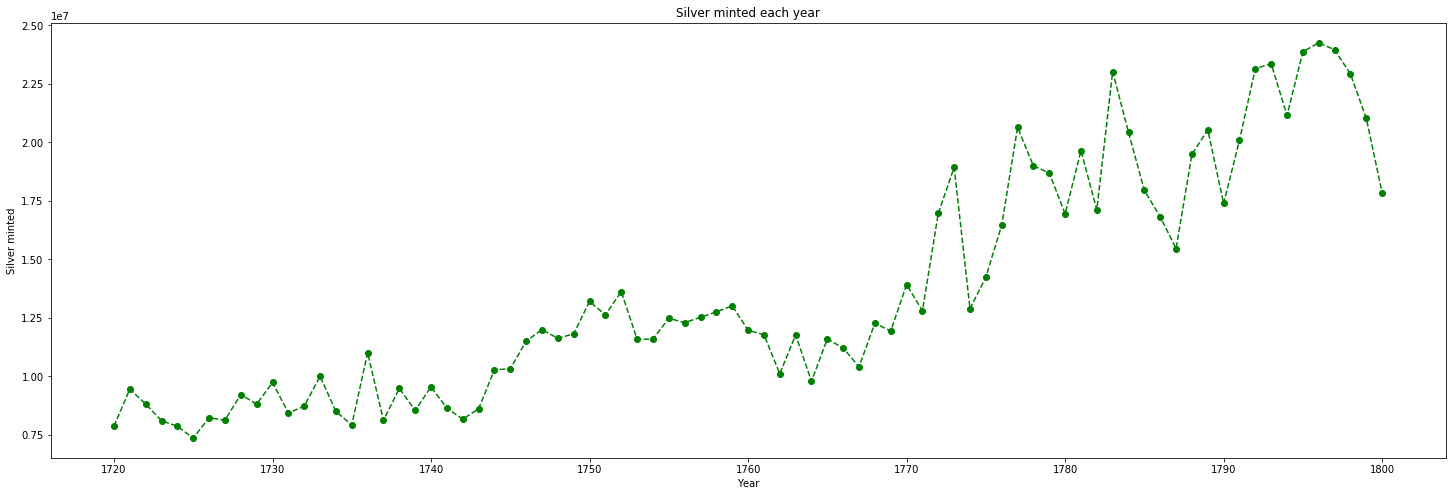

In [12]:
plt.figure(figsize=(25,8))
plt.plot(df.year, df.silver_minted, color="green", linestyle='--', marker='o')
plt.title('Silver minted each year')
plt.xlabel('Year')
plt.ylabel('Silver minted')
plt.show()

Finally we can set the xticks or yticks we want (We could also set_xticklabels with a list of labels if we had some discrete value list)

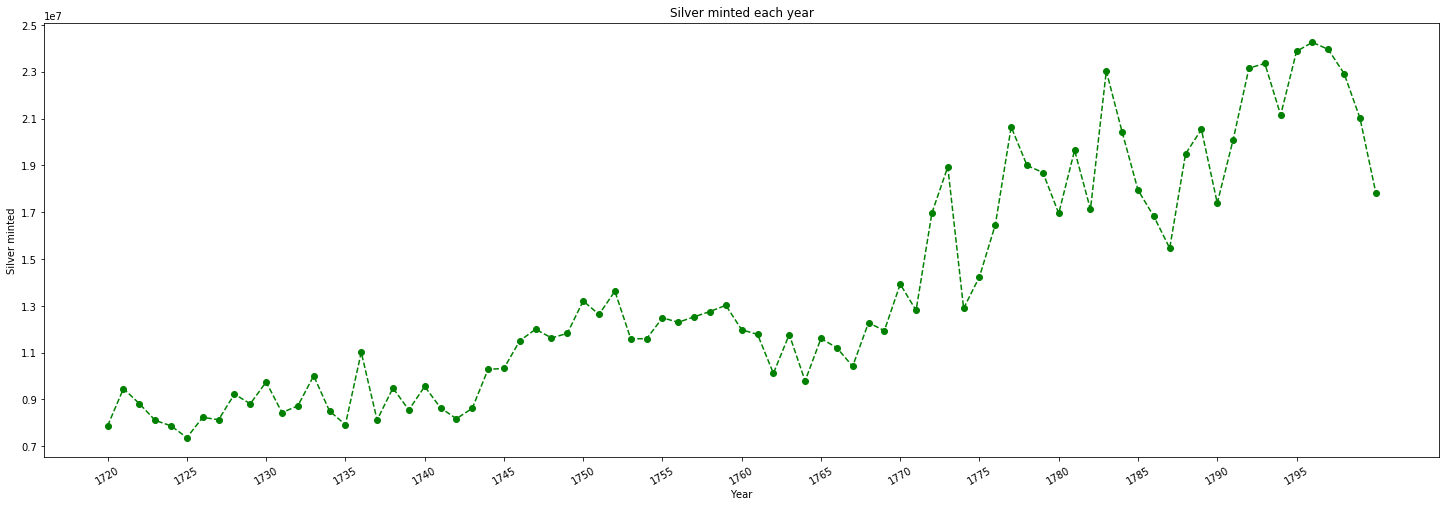

In [13]:
plt.figure(figsize=(25,8))
plt.plot(df.year, df.silver_minted, color="green", linestyle='--', marker='o')
plt.title('Silver minted each year')
plt.xlabel('Year')
plt.ylabel('Silver minted')
plt.xticks(range(1720, 1800, 5), rotation=30)
plt.yticks(range(7000000, 26000000, 2000000))
plt.show()

We can also draw the error

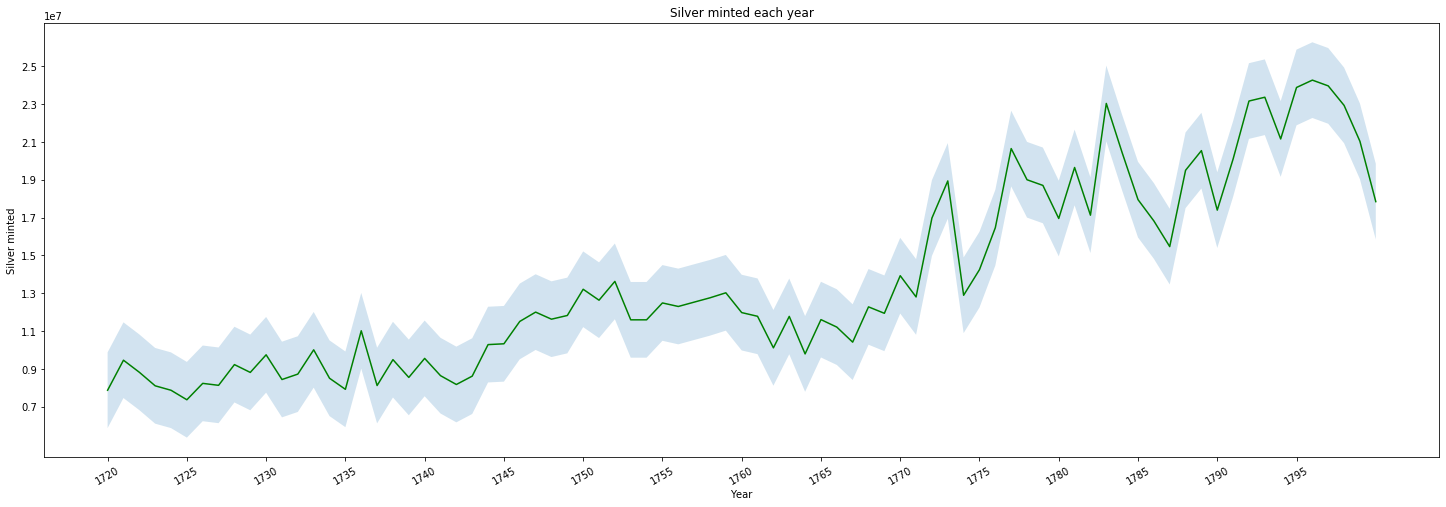

In [14]:
plt.figure(figsize=(25,8))
plt.plot(df.year, df.silver_minted, color="green")
plt.title('Silver minted each year')
plt.xlabel('Year')
plt.ylabel('Silver minted')
plt.xticks(range(1720, 1800, 5), rotation=30)
plt.yticks(range(7000000, 26000000, 2000000))
plt.fill_between(df.year, df.silver_minted-2000000, df.silver_minted+2000000, alpha=0.2)
plt.show()

## Bar

In [15]:
df_original = pd.read_csv('../datasets/iris/iris.csv')
df = df_original.groupby('Species').mean().reset_index()
df.head()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


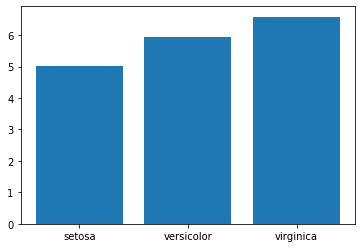

In [16]:
plt.bar(df['Species'], df['Sepal.Length'])
plt.show()

Sometimes we'd like to show cumulative bar charts

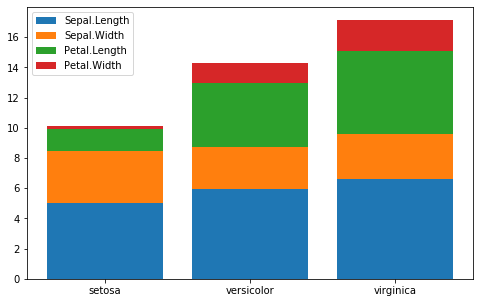

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(df['Species'], df['Sepal.Length'])
plt.bar(df['Species'], df['Sepal.Width'], bottom=df['Sepal.Length'])
plt.bar(df['Species'], df['Petal.Length'], bottom=df['Sepal.Length']+df['Sepal.Width'])
plt.bar(df['Species'], df['Petal.Width'], bottom=df['Sepal.Length']+df['Sepal.Width']+df['Petal.Length'])
plt.legend(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])
plt.show()

Also, it could be useful to show an error bar

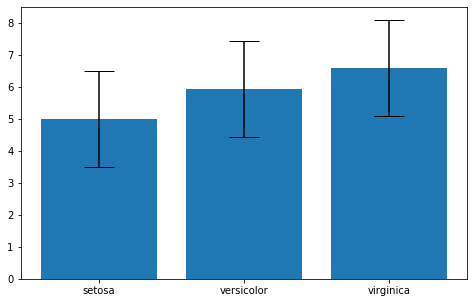

In [18]:
plt.figure(figsize=(8, 5))
plt.bar(df['Species'], df['Sepal.Length'], yerr=1.5, capsize=15)
plt.show()

## Pie

In [19]:
df_original = pd.read_csv('../datasets/bank/bank.csv', sep=';')
df = df_original.groupby('education').count()['age'].reset_index()
df.rename(columns={'age': 'count'}, inplace=True)
df

,education,count
0,basic.4y,429
1,basic.6y,228
2,basic.9y,574
3,high.school,921
4,illiterate,1
5,professional.course,535
6,university.degree,1264
7,unknown,167


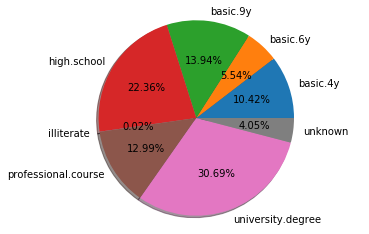

In [20]:
plt.pie(df['count'], labels=df['education'], autopct='%1.2f%%', shadow=True)
plt.axis('equal')
plt.show()

Or maybe we want the labels to be in a legend

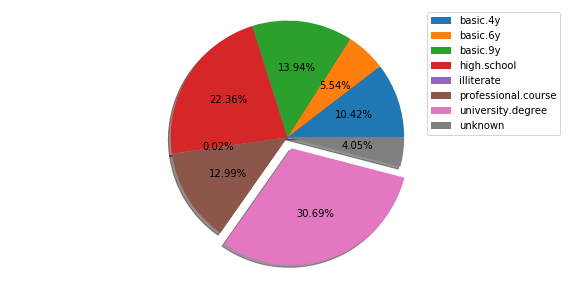

In [21]:
plt.figure(figsize=(10, 5))
explode = [0.1 if l == 'university.degree' else 0 for l in df['education']]
plt.pie(df['count'], autopct='%1.2f%%', explode=explode, shadow=True)
plt.axis('equal')
plt.legend(df['education'])
plt.show()

## Histogram
Divides data in (by default) 10 bars, although we can specify the number of bars we want

In [22]:
df = pd.read_csv('../datasets/titanic/titanic3.csv').dropna(subset=['age'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


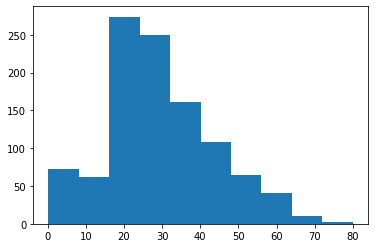

In [23]:
plt.hist(df['age'])
plt.show()

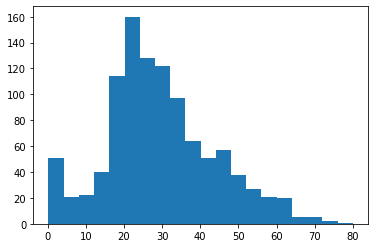

In [24]:
plt.hist(df['age'], bins = 20)
plt.show()

We could also want to show 2 hists about same data but different groups in the same chart

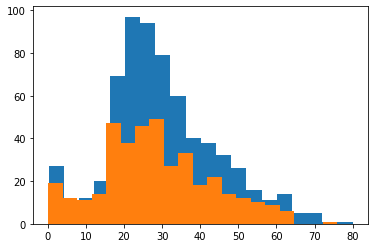

In [25]:
plt.hist(df[df['sex'] == 'male']['age'], bins = 20)
plt.hist(df[df['sex'] == 'female']['age'], bins = 20)

plt.show()

In these cases we'd like to show it with a line instead of fulfilled boxes, to have a better sight, and also we'd like to normalize the data if the data volume is different and we want to compare them.

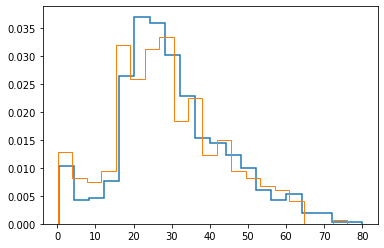

In [26]:
plt.hist(df[df['sex'] == 'male']['age'], bins=20, histtype='step', density=True, linewidth=1.5)
plt.hist(df[df['sex'] == 'female']['age'], bins=20, histtype='step', density=True)

plt.show()

## Scatter
Scatter chart in 2D or 3D

In [27]:
# Orion
x = [-0.41, 0.57, 0.07, 0.00, -0.29, -0.32,-0.50,-0.23, -0.23]
y = [4.12, 7.71, 2.36, 9.10, 13.35, 8.13, 7.19, 13.25,13.43]
z = [2.06, 0.84, 1.56, 2.07, 2.36, 1.72, 0.66, 1.25,1.38]

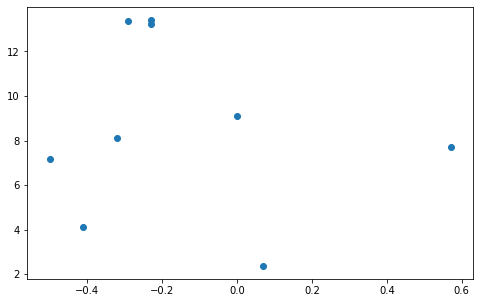

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.show()

<IPython.core.display.Javascript object>


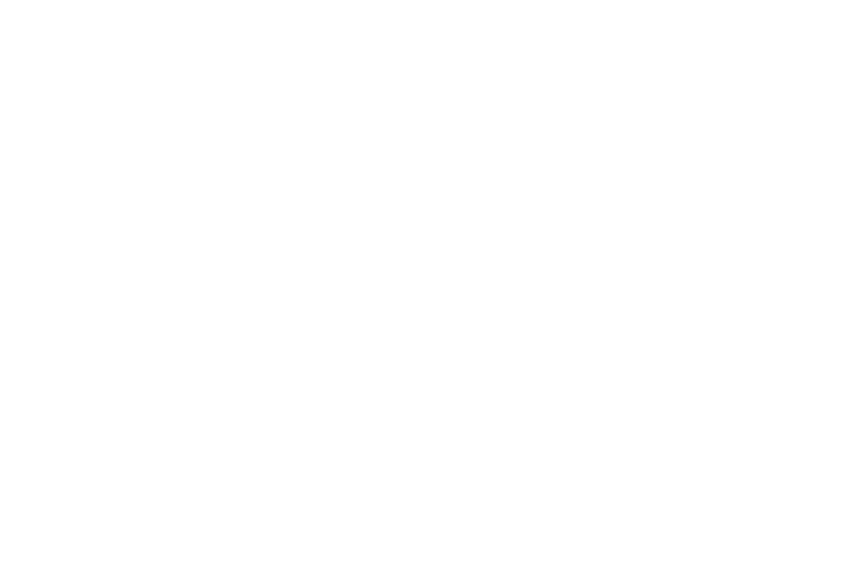

<IPython.core.display.Javascript object>


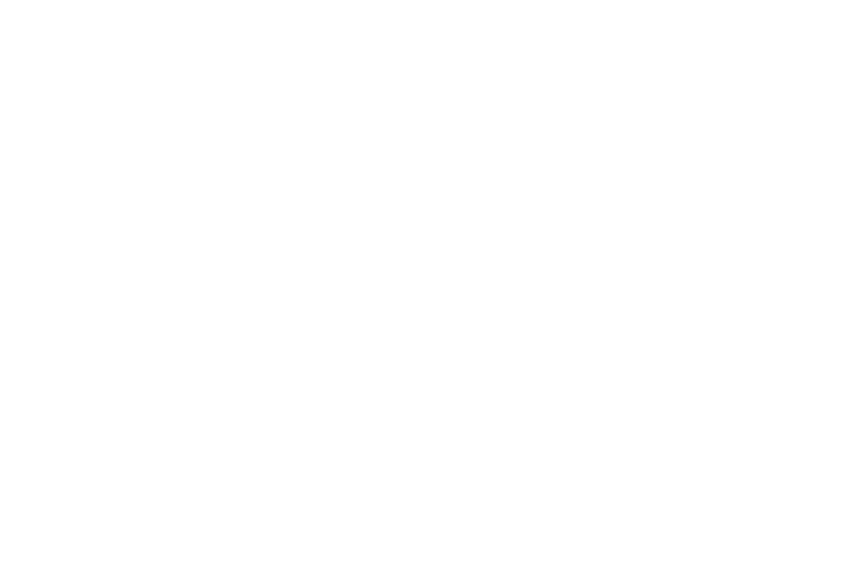

In [29]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig_3d = plt.figure()
fig_3d.add_subplot(1, 1, 1, projection="3d")
plt.scatter(x, y, z, linewidths=5)
plt.show()

# Seaborn

Wrapper over Matplotlib with other kind of charts and customization (Matplotlib needs to be imported too in order to use seaborn)

- [Barplot](#Barplot)
- [KDE Plot](#KDE-Plot)
- [Box Plot](#Box-Plot)
- [Violin Plot](#Violin-Plot)
- [Customization](#Customization)

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Barplot

In [31]:
df = pd.read_csv('../datasets/bank/bank.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


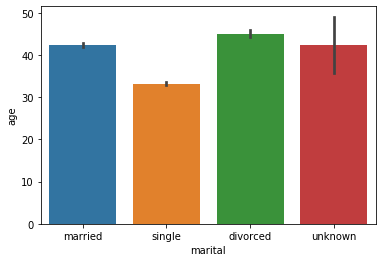

In [32]:
sns.barplot(data=df, x='marital', y='age')
plt.show()

By default the error bar is shown as the bootstrapped confidence interval, but we can specify which strategy to use, for example stantard deviation

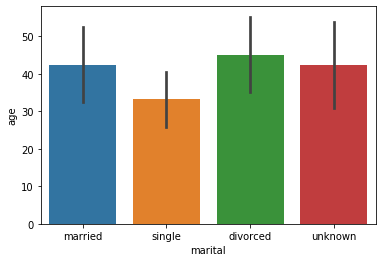

In [33]:
sns.barplot(data=df, x='marital', y='age', ci='sd')
plt.show()

Also by default, the bars show the mean value, but we can pass any function that can be applied to a list to calculate the bars, for example the median.

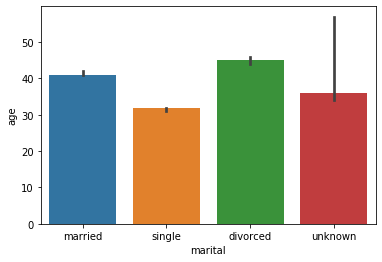

In [34]:
sns.barplot(data=df, x='marital', y='age', estimator=np.median)
plt.show()

Also we can split these bars by other discrete value

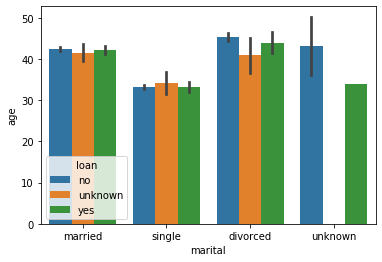

In [35]:
sns.barplot(data=df, x='marital', y='age', hue='loan')
plt.show()

## KDE Plot
(Kernel density estimate)

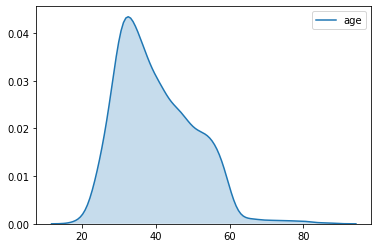

In [36]:
sns.kdeplot(data=df['age'], shade=True)
plt.show()

## Box Plot

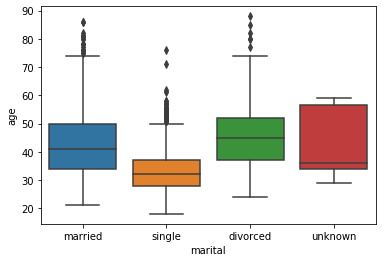

In [37]:
sns.boxplot(data=df, x='marital', y='age')
plt.show()

## Violin Plot

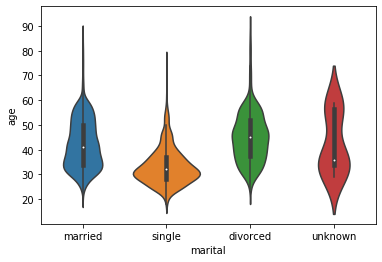

In [38]:
sns.violinplot(data=df, x='marital', y='age')
plt.show()

## Customization
In data visualization, customization is very important

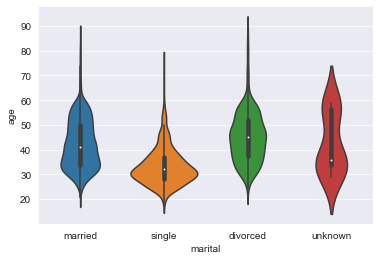

In [62]:
#More styles like whitegrid, dark, white, ticks...
sns.set_style('darkgrid')
sns.violinplot(data=df, x='marital', y='age')
plt.show()

We may want to remove the borders of the chart

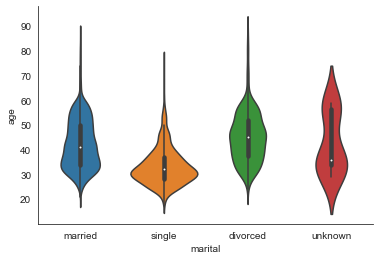

In [60]:
sns.set_style('white')
sns.violinplot(data=df, x='marital', y='age')
sns.despine()
plt.show()

We can set the context of a chart to have some size settings predefined, and also change them with font_scale and the object rc.

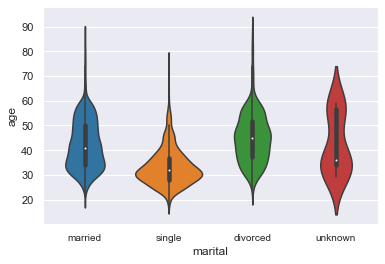

In [78]:
sns.set_context('notebook', rc={'font.size': '12', 'xtick.labelsize':'10'})
sns.violinplot(data=df, x='marital', y='age')
plt.show()

We can see every property of rc object.

In [80]:
sns.set_context('notebook', rc={'font.size': '12', 'xtick.labelsize':'10'})
print(sns.plotting_context())

{'font.size': 12.0, 'axes.labelsize': 12.0, 'axes.titlesize': 12.0, 'xtick.labelsize': 10.0, 'ytick.labelsize': 11.0, 'legend.fontsize': 11.0, 'axes.linewidth': 1.25, 'grid.linewidth': 1.0, 'lines.linewidth': 1.5, 'lines.markersize': 6.0, 'patch.linewidth': 1.0, 'xtick.major.width': 1.25, 'ytick.major.width': 1.25, 'xtick.minor.width': 1.0, 'ytick.minor.width': 1.0, 'xtick.major.size': 6.0, 'ytick.major.size': 6.0, 'xtick.minor.size': 4.0, 'ytick.minor.size': 4.0, 'legend.title_fontsize': 12.0}


Colors are important when displaying a visualization. We can set many color palettes, and we can previsualize the colors the palette is composed of.

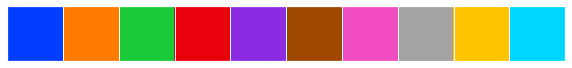

In [97]:
#bright, dark, deep, muted, pastel, colorblind
sns.palplot(sns.color_palette('bright'))

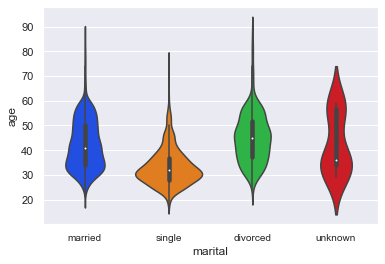

In [99]:
sns.set_palette('bright')
sns.violinplot(data=df, x='marital', y='age')
plt.show()

We can also use a ColorBrewer palette, which can be sequential (to represent sorted values), qualitative (to represent categories) or diverging (similar to sequentials but highlighting both extremes). We can find the one we want like this:

In [106]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

And then select it like this

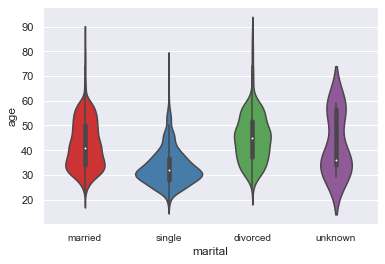

In [109]:
sns.set_palette('Set1')
sns.violinplot(data=df, x='marital', y='age')
plt.show()